In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv("C:/Users/Akif/Desktop/football/data_10years_10leagues.csv")
data.shape

(17115, 16)

In [4]:
target_columns = ['result']
feature_columns = ['own_goals', 'own_position', 'opponent_goals', 'opponent_position', 'home_total_market_value', 'home_key_players', 'away_total_market_value', 'away_key_players', 'home_position_to_goal', 'away_position_to_goal', 'home_win_h2h', 'home_home_win', 'away_away_win', 'home_last_5_game_win', 'away_last_5_game_win']

In [5]:
X = data[feature_columns].values
y = data[target_columns].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 10953
Validation set size: 2739
Testing set size: 3423


In [6]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50


172/172 - 13s - loss: 1.2857 - accuracy: 0.3497 - val_loss: 1.0778 - val_accuracy: 0.4469 - 13s/epoch - 78ms/step
Epoch 2/50
172/172 - 3s - loss: 1.0880 - accuracy: 0.4030 - val_loss: 1.0714 - val_accuracy: 0.4469 - 3s/epoch - 15ms/step
Epoch 3/50
172/172 - 3s - loss: 1.0799 - accuracy: 0.4316 - val_loss: 1.0703 - val_accuracy: 0.4469 - 3s/epoch - 15ms/step
Epoch 4/50
172/172 - 3s - loss: 1.0751 - accuracy: 0.4351 - val_loss: 1.0711 - val_accuracy: 0.4469 - 3s/epoch - 15ms/step
Epoch 5/50
172/172 - 3s - loss: 1.0734 - accuracy: 0.4409 - val_loss: 1.0699 - val_accuracy: 0.4469 - 3s/epoch - 15ms/step
Epoch 6/50
172/172 - 3s - loss: 1.0739 - accuracy: 0.4403 - val_loss: 1.0696 - val_accuracy: 0.4469 - 3s/epoch - 15ms/step
Epoch 7/50
172/172 - 3s - loss: 1.0733 - accuracy: 0.4414 - val_loss: 1.0696 - val_accuracy: 0.4469 - 3s/epoch - 15ms/step
Epoch 8/50
172/172 - 3s - loss: 1.0708 - accuracy: 0.4442 - val_loss: 1.0694 - val_accuracy: 0.4469 - 3s/epoch - 16ms/step
Epoch 9/50
1

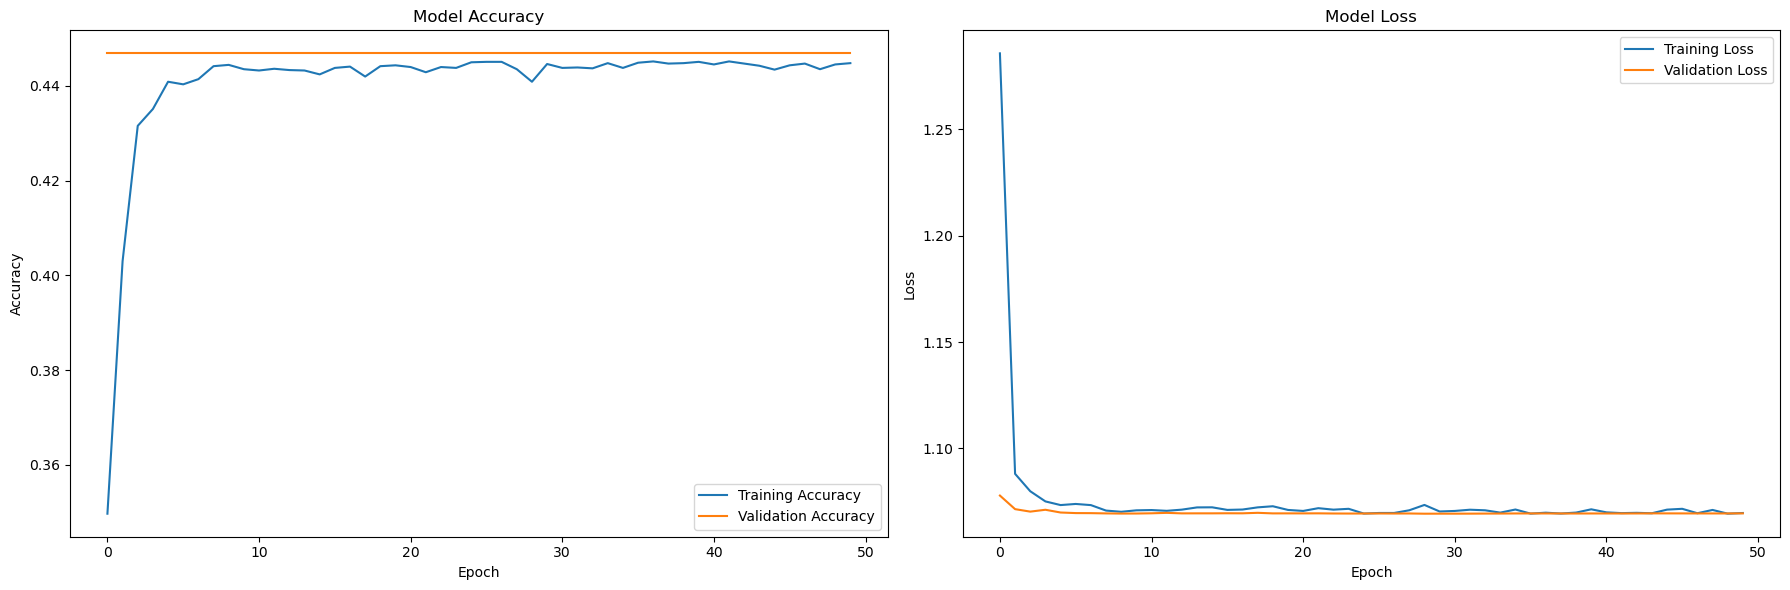

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')


axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')


plt.tight_layout()
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

107/107 [==============================] - 1s 8ms/step - loss: 1.0655 - accuracy: 0.4511
Test Loss: 1.0654776096343994
Test Accuracy: 0.4510663151741028


107/107 [==============================] - 1s 7ms/step


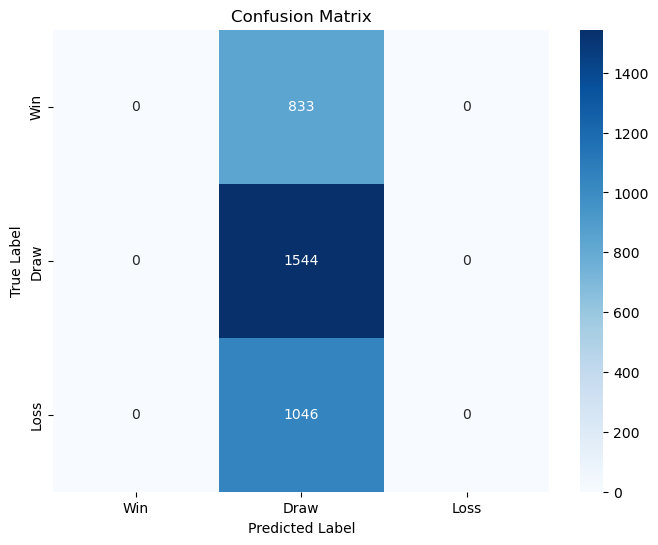

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = ['Win', 'Draw', 'Loss']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()